## Business Problem

Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. For this reason, Centers for Medicare & Medicaid Services established the Hospital Readmissions Reduction Program [link](https://www.cms.gov/medicare/medicare-fee-for-service-payment/acuteinpatientpps/readmissions-reduction-program.html) which aims to improve quality of care for patients and reduce healthcare spending by applying payment penalties to hospitals that have more than expected readmission rates for certain conditions.

Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care. So, with that background in mind, we used a medical claims dataset at hand, to answer these questions:
* Which feature are the strongest predictors of hospital readmission.
* And, How well these predictor hepl us to predict hospital readmission.

## Machine learning Solution

With given problem statement at hand, i tried to create a classification model which predict the re-admission possibility of a patient into the hospital. To do so, i followed the below model building approch:
* Data Exploration
* Data pre processing
* Data Visulaization
* Feature engineering
* Feature creation
* Model buliding 
    * Logistic Regression
    * Decision Tree
    * Random Forest


### Data Preparation & Exploration

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Readiing files
Train = pd.read_csv("Train.csv")
Diagnosis = pd.read_csv("Train_Diagnosis_TreatmentData.csv")
Hospitalization = pd.read_csv("Train_HospitalizationData.csv")

In [4]:
#Combining files
from functools import reduce
dfs = [Train, Diagnosis, Hospitalization]
df = reduce(lambda left,right: pd.merge(left,right,on='patientID'), dfs)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34650 entries, 0 to 34649
Data columns (total 45 columns):
patientID                   34650 non-null object
race                        34650 non-null object
gender                      34650 non-null object
age                         34650 non-null object
weight                      34650 non-null object
readmitted                  34650 non-null object
num_lab_procedures          34650 non-null int64
num_procedures              34650 non-null int64
num_medications             34650 non-null int64
num_diagnoses               34650 non-null int64
diagnosis_1                 34650 non-null object
diagnosis_2                 34650 non-null object
diagnosis_3                 34650 non-null object
max_glu_serum               34650 non-null object
A1Cresult                   34650 non-null object
metformin                   34650 non-null object
repaglinide                 34650 non-null object
nateglinide                 34650 non-null ob

In [9]:
df.describe()

,num_lab_procedures,num_procedures,num_medications,num_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id
count,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000,34650.000000
mean,42.649206,1.453131,15.584762,7.122886,2.081558,3.749986,5.526753
std,19.899355,1.759489,8.509216,2.039727,1.472163,5.459886,4.101795
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,31.000000,0.000000,10.000000,5.000000,1.000000,1.000000,1.000000
50%,44.000000,1.000000,14.000000,8.000000,1.000000,1.000000,7.000000
75%,57.000000,2.000000,20.000000,9.000000,3.000000,3.000000,7.000000
max,132.000000,6.000000,81.000000,16.000000,8.000000,28.000000,25.000000


In [10]:
df.head()

,patientID,race,gender,age,weight,readmitted,num_lab_procedures,num_procedures,num_medications,num_diagnoses,...,change,diabetesMed,AdmissionID,Admission_date,Discharge_date,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty
0,PT11101,Caucasian,Male,[80-90),?,NO,18,1,7,7,...,Ch,Yes,ADM31792,2015-07-18,2015-07-23,2,1,7,SP,Emergency/Trauma
1,PT11102,Caucasian,Male,[70-80),?,NO,40,4,16,9,...,No,Yes,ADM42286,2016-04-23,2016-04-29,1,3,7,HM,?
2,PT11103,?,Female,[60-70),?,NO,39,1,12,5,...,Ch,Yes,ADM43029,2016-05-13,2016-05-17,2,1,1,MC,InternalMedicine
3,PT11104,Caucasian,Female,[70-80),?,NO,1,0,10,9,...,No,Yes,ADM30585,2015-06-16,2015-06-18,1,1,7,MC,?
4,PT11105,Caucasian,Female,[60-70),?,Within30days,44,0,16,9,...,No,Yes,ADM40516,2016-03-08,2016-03-09,1,1,7,MD,?


### Missing Values and Data imputation

In [11]:
# Checking for duplicate rows
duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [patientID, race, gender, age, weight, readmitted, num_lab_procedures, num_procedures, num_medications, num_diagnoses, diagnosis_1, diagnosis_2, diagnosis_3, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, insulin, glyburide.metformin, glipizide.metformin, metformin.rosiglitazone, metformin.pioglitazone, change, diabetesMed, AdmissionID, Admission_date, Discharge_date, admission_type_id, discharge_disposition_id, admission_source_id, payer_code, medical_specialty]
Index: []

[0 rows x 45 columns]


In [12]:
# Replacing '?' with na and checking the count
df=df.replace('?', np.NaN)
df.isnull().sum()

patientID                       0
race                         1079
gender                          0
age                             0
weight                      33592
readmitted                      0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
num_diagnoses                   0
diagnosis_1                     6
diagnosis_2                   179
diagnosis_3                   681
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide    

In [13]:
#dropping columns with large number of missing values
#Variable weight contains 96.94% missing value so removing it
#payer_code contains 42.47 % missing value so removing it
#medical_specialty contains 47.31% missing value so removing it
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [14]:
# Impute missing values. 
# Columns of dtype object are imputed with the most frequent value in column.
# Columns of other types are imputed with mean of column.
df["race"].fillna(df.groupby("age")["race"].transform(lambda x: x.fillna(x.mode()[0])), inplace=True)
df["diagnosis_1"].fillna(df.groupby("age")["diagnosis_1"].transform(lambda x: x.fillna(x.mode()[0])), inplace=True)
df["diagnosis_2"].fillna(df.groupby("age")["diagnosis_2"].transform(lambda x: x.fillna(x.mode()[0])), inplace=True)
df["diagnosis_3"].fillna(df.groupby("age")["diagnosis_3"].transform(lambda x: x.fillna(x.mode()[0])), inplace=True)

### Feature engineering and Visulaization

In [15]:
# Distribution of Readmission
df['readmitted'] = df['readmitted'].replace('Within30days', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)
df['readmitted'].value_counts()

0    29891
1     4759
Name: readmitted, dtype: int64

Text(0.5,1,'Distribution of Readmission')

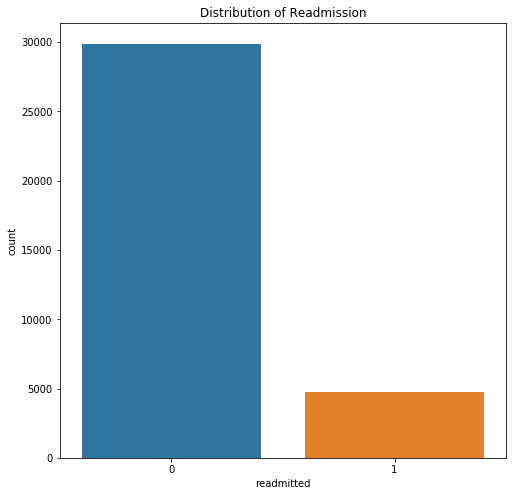

In [16]:
fig = plt.figure(figsize=(8,8)) 
sns.countplot(df['readmitted']).set_title('Distribution of Readmission')

In [17]:
#Encoding race variable
df['race'] = df['race'].replace('Caucasian', 0)
df['race'] = df['race'].replace('AfricanAmerican', 1)
df['race'] = df['race'].replace('Hispanic', 2)
df['race'] = df['race'].replace('Other', 3)
df['race'] = df['race'].replace('Asian', 4)

Text(0.5,1,'Distribution of Readmission')

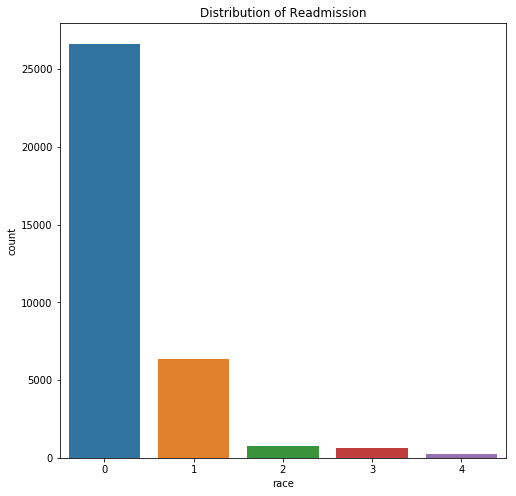

In [85]:
fig = plt.figure(figsize=(8,8)) 
sns.countplot(df['race']).set_title('Distribution of Readmission')

In [18]:
# Age as we know is ordinal but in data set its given as nominal, so converting nominal to ordinal taking average of ranges
df['age'] = df['age'].replace('[0-10)', 5)
df['age'] = df['age'].replace('[10-20)',15)
df['age'] = df['age'].replace('[20-30)',25)
df['age'] = df['age'].replace('[30-40)',35)
df['age'] = df['age'].replace('[40-50)',45)
df['age'] = df['age'].replace('[50-60)',55)
df['age'] = df['age'].replace('[60-70)',65)
df['age'] = df['age'].replace('[70-80)',75)
df['age'] = df['age'].replace('[80-90)',85)
df['age'] = df['age'].replace('[90-100)',95)

df['age'] = df['age'].astype('int32')

print(df.age.value_counts())

75    8532
65    7677
55    6098
85    5486
45    3409
35    1468
95    1015
25     598
15     277
5       90
Name: age, dtype: int64


Text(0.5,1,'Age of Patient VS Readmission')

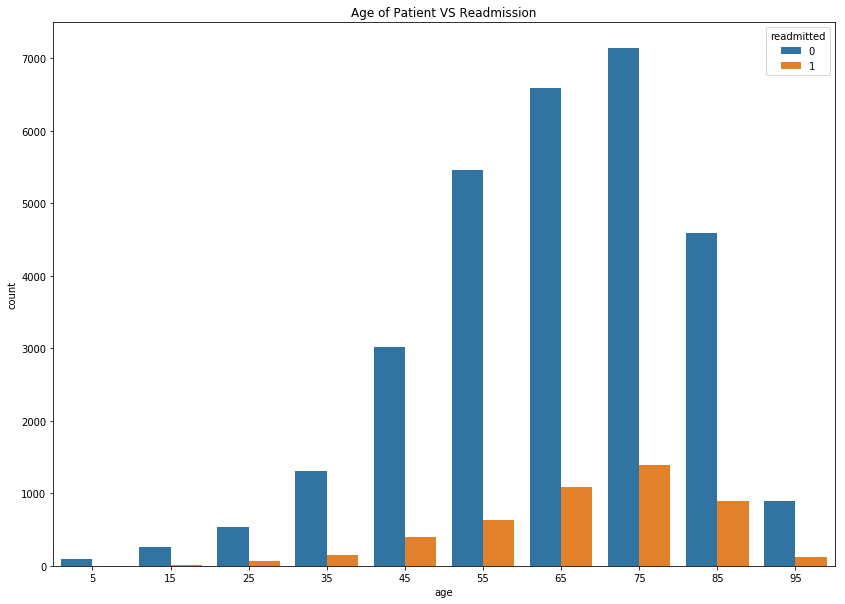

In [19]:
fig = plt.figure(figsize=(14,10))
sns.countplot(x= df['age'], hue = df['readmitted']).set_title('Age of Patient VS Readmission')

In [20]:
#Encoding gender as 0 & 1
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

Text(0.5,1,'Gender of Patient VS Readmission')

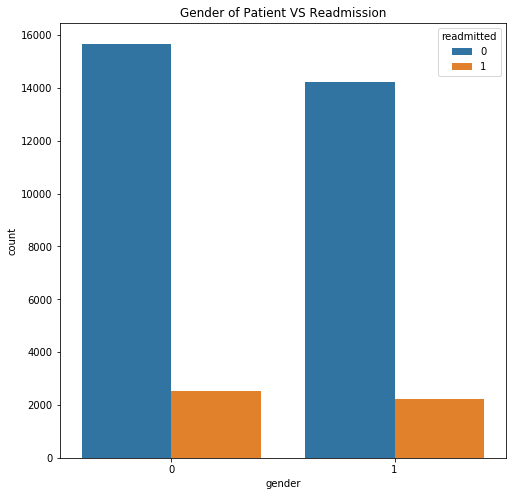

In [21]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS Readmission")

In [22]:
#Encoding change as 0 & 1
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

Text(0.5,1,'Change of Medication VS Readmission')

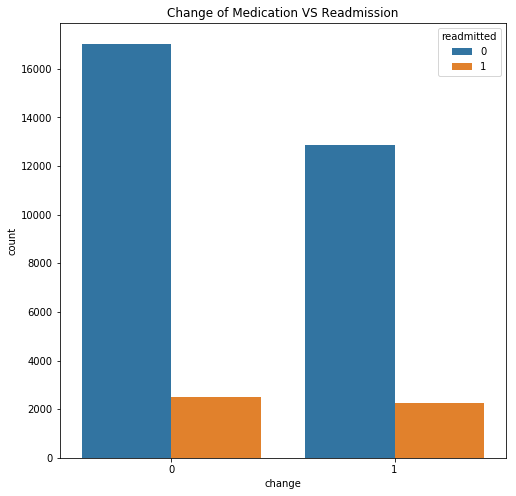

In [23]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['readmitted']).set_title('Change of Medication VS Readmission')

In [24]:
#Encoding diabetesMed as 0 & 1
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

Text(0.5,1,'Diabetes Medication prescribed VS Readmission')

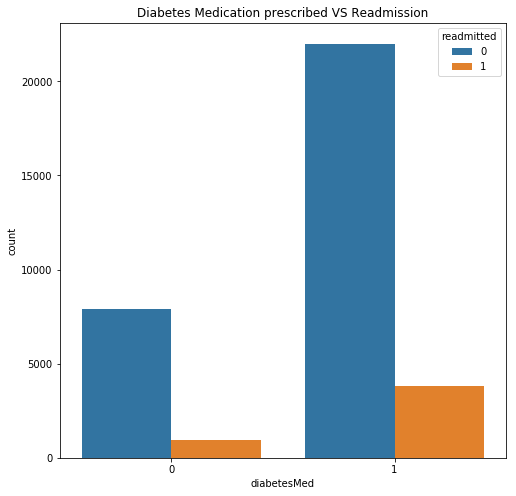

In [25]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

In [26]:
# Checking medication column and how data are distributed
medication=df[['metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'insulin',
'glyburide.metformin',
'glipizide.metformin',
'metformin.rosiglitazone',
'metformin.pioglitazone']]

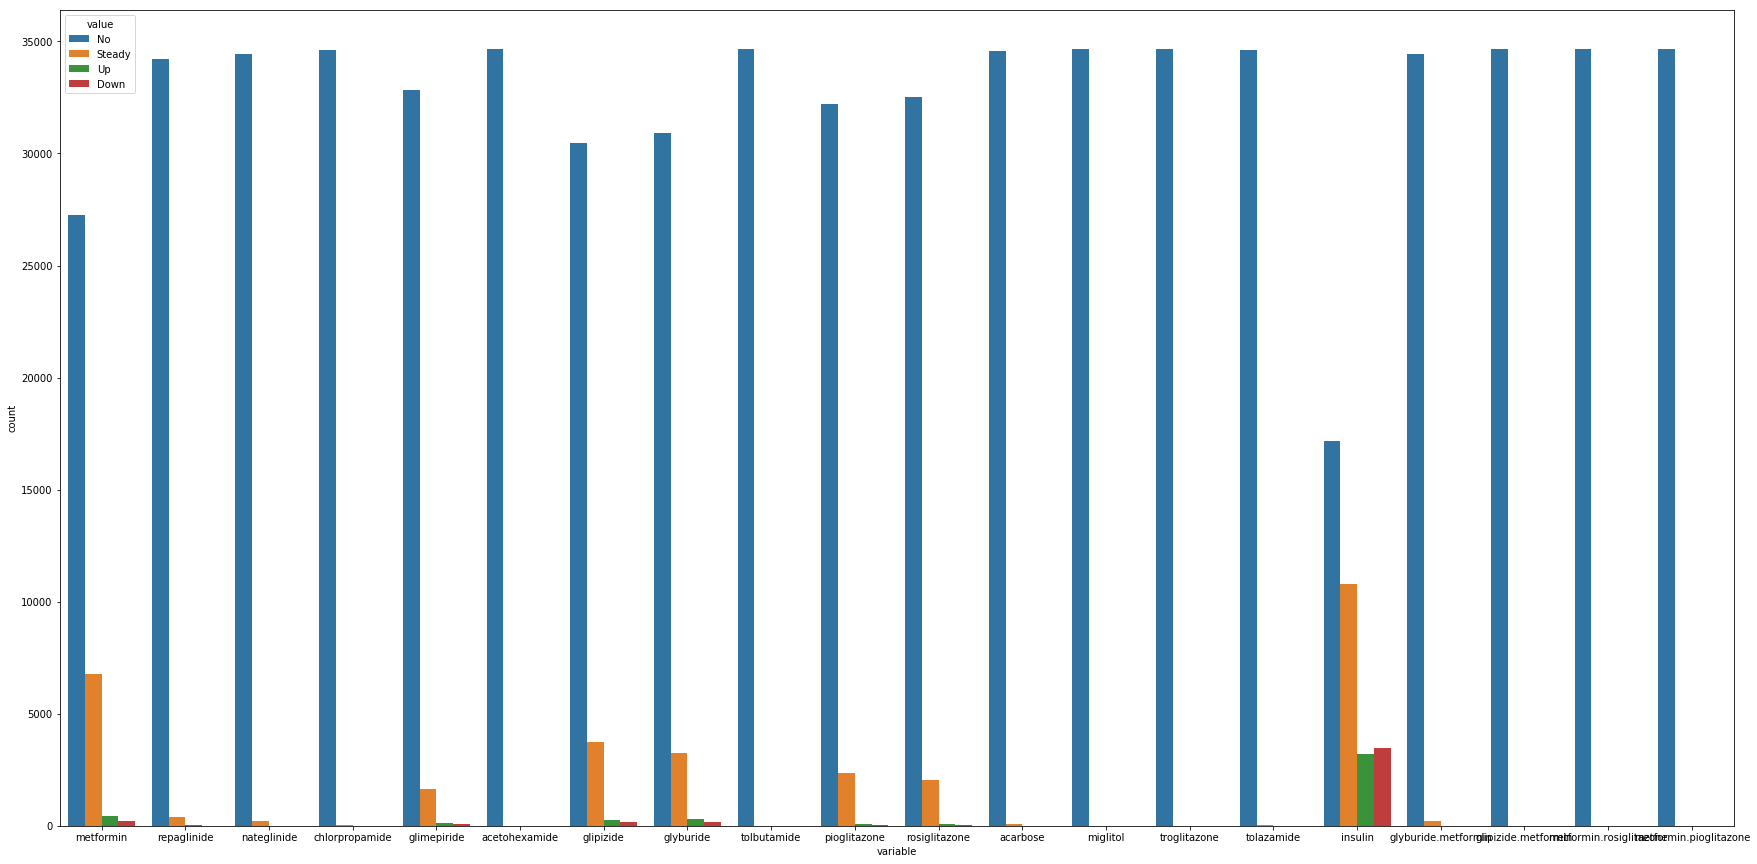

In [27]:
plt.figure(figsize=(30, 15))
sns.countplot(x="variable", hue="value", data=pd.melt(medication))
plt.show()

In [28]:
# For medication, creating either it has effect or it has no effect
medication=['metformin',
'repaglinide',
'nateglinide',
'glimepiride',
'glipizide',
'glyburide',
'pioglitazone',
'rosiglitazone',
'insulin',
'glyburide.metformin']


for col in medication:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

C:\Users\U0170371\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Number of medication used VS Readmission')

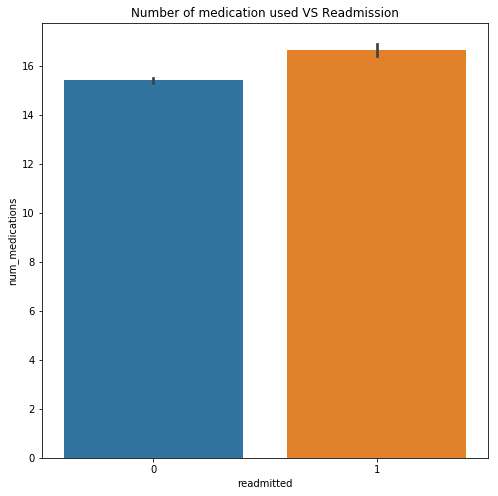

In [29]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS Readmission")

In [30]:
# Encoding A1C test result 
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -1)

Text(0.5,1,'A1C test result VS Readmission')

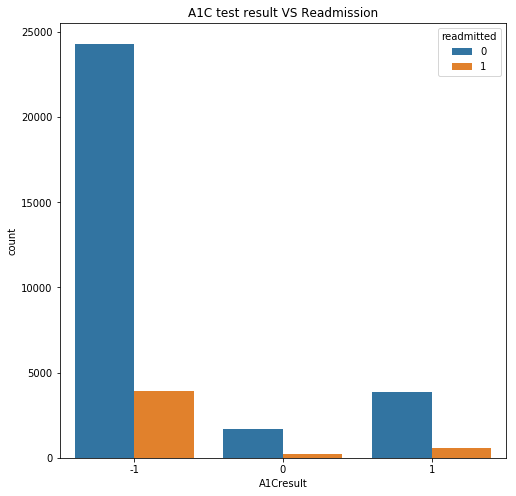

In [31]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x= df['A1Cresult'], hue = df['readmitted']).set_title('A1C test result VS Readmission')

In [32]:
# Encoding max_glu_serum test result
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -1)

Text(0.5,1,'Glucose test serum test result VS Readmission')

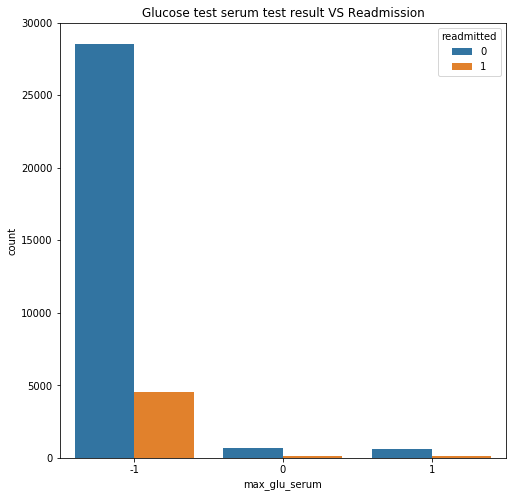

In [33]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS Readmission')

In [34]:
# Calculating time_in_hospital
df['Admission_date'] = pd.to_datetime(df['Admission_date'])
df['Discharge_date'] = pd.to_datetime(df['Discharge_date'])
df['time_in_hospital'] = (df['Discharge_date'] - df['Admission_date']).dt.days
df['time_in_hospital'] = df['time_in_hospital'].astype('int32')

Text(0.5,1,'Time_in_hospital VS Readmission')

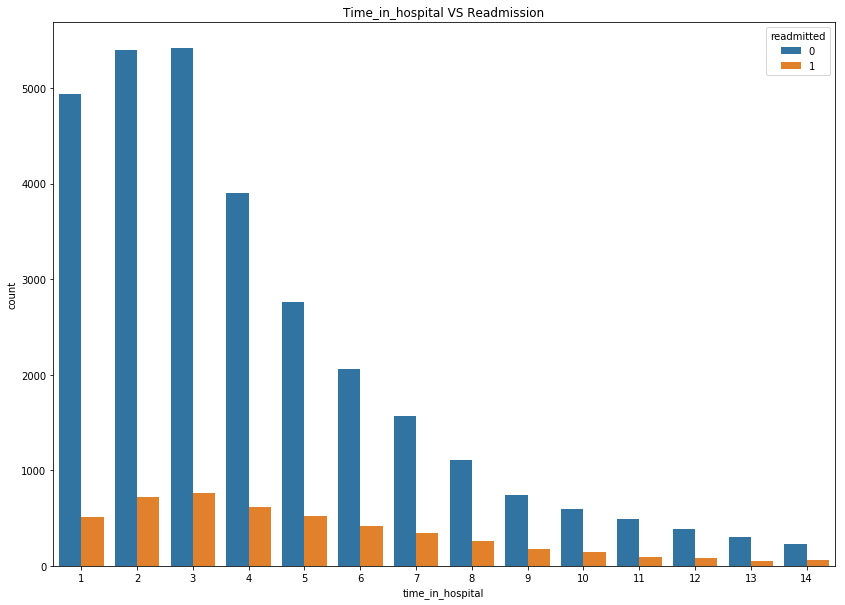

In [35]:
fig = plt.figure(figsize=(14,10))
sns.countplot(x = df['time_in_hospital'], hue = df['readmitted']).set_title('Time_in_hospital VS Readmission')

In [36]:
# Creating categories for different type of diagnosis
df['D1'] = df['diagnosis_1']
df['D2'] = df['diagnosis_2']
df['D3'] = df['diagnosis_3']

In [37]:
# disease codes starting with V or E are recoded to 0
df.loc[df['diagnosis_1'].str.contains('V'), ['D1']] = 0
df.loc[df['diagnosis_1'].str.contains('E'), ['D1']] = 0
df.loc[df['diagnosis_2'].str.contains('V'), ['D2']] = 0
df.loc[df['diagnosis_2'].str.contains('E'), ['D2']] = 0
df.loc[df['diagnosis_3'].str.contains('V'), ['D3']] = 0
df.loc[df['diagnosis_3'].str.contains('E'), ['D3']] = 0

In [38]:
df['D1'] = df['D1'].astype(float)
df['D2'] = df['D2'].astype(float)
df['D3'] = df['D3'].astype(float)

In [39]:
# Creating categories as per ICD-9 codes
for index, row in df.iterrows():
    if (row['D1'] >= 1 and row['D1'] < 139.9):
        df.loc[index, 'D1'] = 1
    elif (row['D1'] >= 140 and row['D1'] < 239.9):
        df.loc[index, 'D1'] = 2
    elif (row['D1'] >= 240 and row['D1'] < 279.9):
        df.loc[index, 'D1'] = 3
    elif (row['D1'] >= 280 and row['D1'] < 289.9):
        df.loc[index, 'D1'] = 4
    elif (row['D1'] >= 290 and row['D1'] < 319):
        df.loc[index, 'D1'] = 5
    elif (row['D1'] >= 320 and row['D1'] < 389.9):
        df.loc[index, 'D1'] = 6
    elif (row['D1'] >= 390 and row['D1'] < 459.9):
        df.loc[index, 'D1'] = 7
    elif (row['D1'] >= 460 and row['D1'] < 519.9):
        df.loc[index, 'D1'] = 8
    elif (row['D1'] >= 520 and row['D1'] < 579.9):
        df.loc[index, 'D1'] = 9
    elif (row['D1'] >= 580 and row['D1'] < 629.9):
        df.loc[index, 'D1'] = 10
    elif (row['D1'] >= 630 and row['D1'] < 676.9):
        df.loc[index, 'D1'] = 11
    elif (row['D1'] >= 680 and row['D1'] < 709.9):
        df.loc[index, 'D1'] = 12
    elif (row['D1'] >= 710 and row['D1'] < 739.9):
        df.loc[index, 'D1'] = 13
    elif (row['D1'] >= 740 and row['D1'] < 759.9):
        df.loc[index, 'D1'] = 14
    elif (row['D1'] >= 760 and row['D1'] < 779.9):
        df.loc[index, 'D1'] = 15
    elif (row['D1'] >= 780 and row['D1'] < 799.9):
        df.loc[index, 'D1'] = 16
    elif (row['D1'] >= 800 and row['D1'] < 999.9):
        df.loc[index, 'D1'] = 17
    else:
        df.loc[index, 'D1'] = 0
           
        

for index, row in df.iterrows():
    if (row['D2'] >= 1 and row['D2'] < 139.9):
        df.loc[index, 'D2'] = 1
    elif (row['D2'] >= 140 and row['D2'] < 239.9):
        df.loc[index, 'D2'] = 2
    elif (row['D2'] >= 240 and row['D2'] < 279.9):
        df.loc[index, 'D2'] = 3
    elif (row['D2'] >= 280 and row['D2'] < 289.9):
        df.loc[index, 'D2'] = 4
    elif (row['D2'] >= 290 and row['D2'] < 319):
        df.loc[index, 'D2'] = 5
    elif (row['D2'] >= 320 and row['D2'] < 389.9):
        df.loc[index, 'D2'] = 6
    elif (row['D2'] >= 390 and row['D2'] < 459.9):
        df.loc[index, 'D2'] = 7
    elif (row['D2'] >= 460 and row['D2'] < 519.9):
        df.loc[index, 'D2'] = 8
    elif (row['D2'] >= 520 and row['D2'] < 579.9):
        df.loc[index, 'D2'] = 9
    elif (row['D2'] >= 580 and row['D2'] < 629.9):
        df.loc[index, 'D2'] = 10
    elif (row['D2'] >= 630 and row['D2'] < 676.9):
        df.loc[index, 'D2'] = 11
    elif (row['D2'] >= 680 and row['D2'] < 709.9):
        df.loc[index, 'D2'] = 12
    elif (row['D2'] >= 710 and row['D2'] < 739.9):
        df.loc[index, 'D2'] = 13
    elif (row['D2'] >= 740 and row['D2'] < 759.9):
        df.loc[index, 'D2'] = 14
    elif (row['D2'] >= 760 and row['D2'] < 779.9):
        df.loc[index, 'D2'] = 15
    elif (row['D2'] >= 780 and row['D2'] < 799.9):
        df.loc[index, 'D2'] = 16
    elif (row['D2'] >= 800 and row['D2'] < 999.9):
        df.loc[index, 'D2'] = 17
    else:
        df.loc[index, 'D2'] = 0
        
        

for index, row in df.iterrows():
    if (row['D3'] >= 1 and row['D3'] < 139.9):
        df.loc[index, 'D3'] = 1
    elif (row['D3'] >= 140 and row['D3'] < 239.9):
        df.loc[index, 'D3'] = 2
    elif (row['D3'] >= 240 and row['D3'] < 279.9):
        df.loc[index, 'D3'] = 3
    elif (row['D3'] >= 280 and row['D3'] < 289.9):
        df.loc[index, 'D3'] = 4
    elif (row['D3'] >= 290 and row['D3'] < 319):
        df.loc[index, 'D3'] = 5
    elif (row['D3'] >= 320 and row['D3'] < 389.9):
        df.loc[index, 'D3'] = 6
    elif (row['D3'] >= 390 and row['D3'] < 459.9):
        df.loc[index, 'D3'] = 7
    elif (row['D3'] >= 460 and row['D3'] < 519.9):
        df.loc[index, 'D3'] = 8
    elif (row['D3'] >= 520 and row['D3'] < 579.9):
        df.loc[index, 'D3'] = 9
    elif (row['D3'] >= 580 and row['D3'] < 629.9):
        df.loc[index, 'D3'] = 10
    elif (row['D3'] >= 630 and row['D3'] < 676.9):
        df.loc[index, 'D3'] = 11
    elif (row['D3'] >= 680 and row['D3'] < 709.9):
        df.loc[index, 'D3'] = 12
    elif (row['D3'] >= 710 and row['D3'] < 739.9):
        df.loc[index, 'D3'] = 13
    elif (row['D3'] >= 740 and row['D3'] < 759.9):
        df.loc[index, 'D3'] = 14
    elif (row['D3'] >= 760 and row['D3'] < 779.9):
        df.loc[index, 'D3'] = 15
    elif (row['D3'] >= 780 and row['D3'] < 799.9):
        df.loc[index, 'D3'] = 16
    elif (row['D3'] >= 800 and row['D3'] < 999.9):
        df.loc[index, 'D3'] = 17
    else:
        df.loc[index, 'D3'] = 0


Text(0.5,1,'Diagnosis test One VS Readmission')

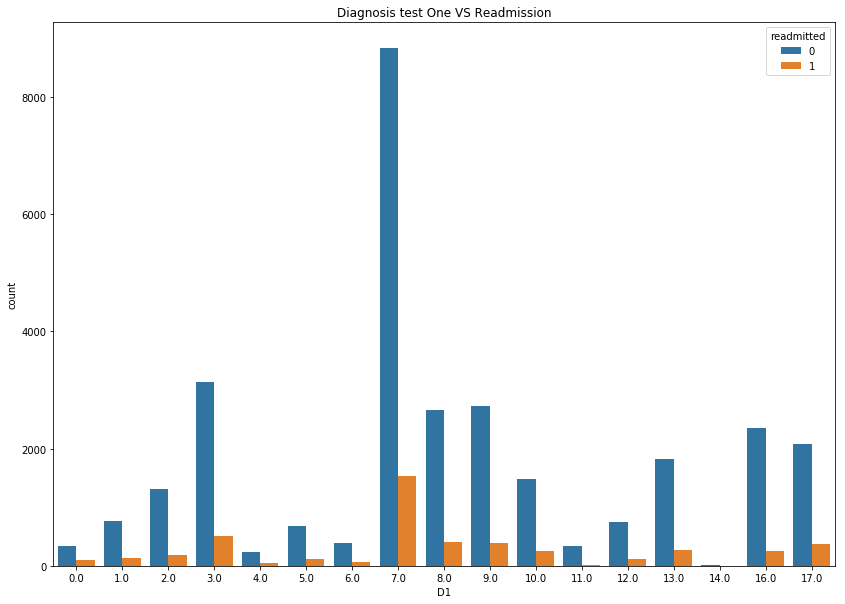

In [40]:
fig = plt.figure(figsize=(14,10))
sns.countplot(x = df['D1'], hue = df['readmitted']).set_title('Diagnosis test One VS Readmission')

Text(0.5,1,'Diagnosis test two VS Readmission')

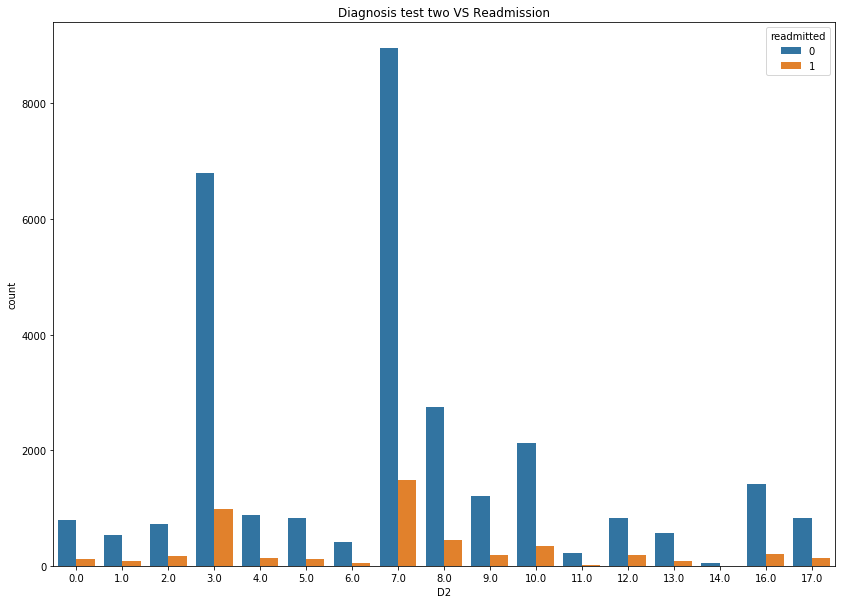

In [41]:
fig = plt.figure(figsize=(14,10))
sns.countplot(x = df['D2'], hue = df['readmitted']).set_title('Diagnosis test two VS Readmission')

Text(0.5,1,'Diagnosis test three VS Readmission')

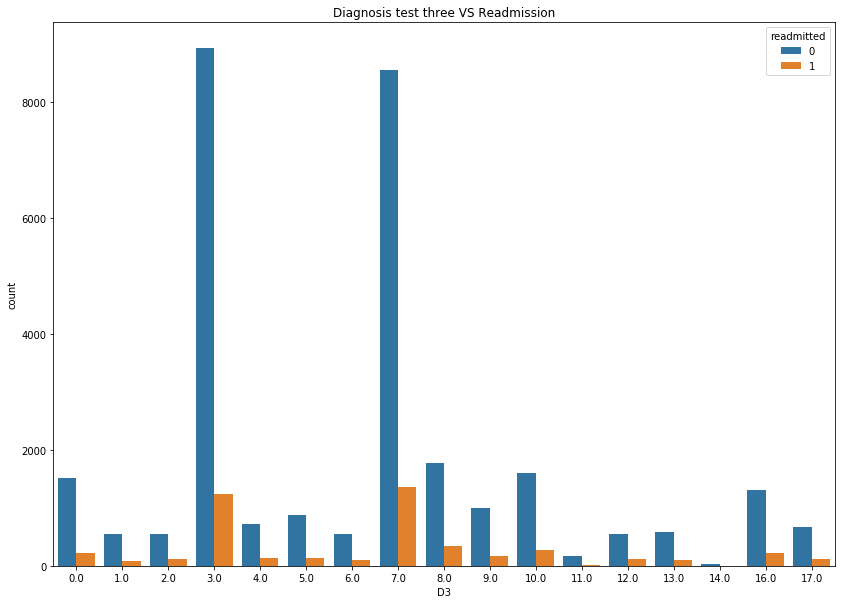

In [42]:
fig = plt.figure(figsize=(14,10))
sns.countplot(x = df['D3'], hue = df['readmitted']).set_title('Diagnosis test three VS Readmission')

In [43]:
# Creating subcategory for admission_type_id
df['admission_type_id'] = df['admission_type_id'].replace([1,2,7],1)
df['admission_type_id'] = df['admission_type_id'].replace([5,6,8],2)
df['admission_type_id'] = df['admission_type_id'].replace([3,4],3)

Text(0.5,1,'Admission type of Patient VS Readmission')

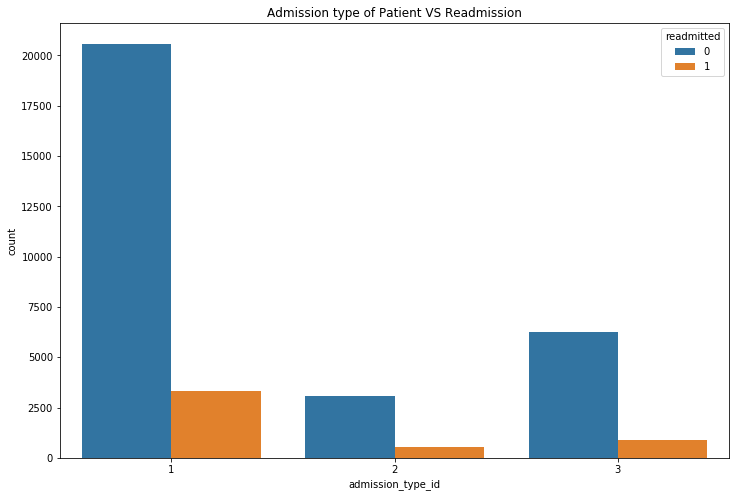

In [44]:
fig = plt.figure(figsize=(12,8))
sns.countplot(x= df['admission_type_id'], hue = df['readmitted']).set_title('Admission type of Patient VS Readmission')

In [45]:
# Creating subcategory for discharge_disposition_id
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace([1,6,8,7,13],1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace([2,3,10,14,16,22,23,24,27,28,29,30],2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace([4,5,9,12,15,17],3)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace([11,19,20,21],4)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace([18,25,26],5)

Text(0.5,1,'Discharge type of Patient VS Readmission')

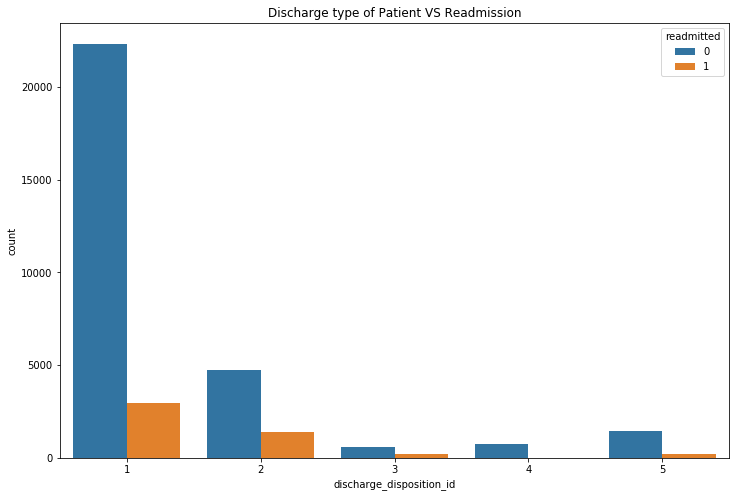

In [46]:
fig = plt.figure(figsize=(12,8))
sns.countplot(x= df['discharge_disposition_id'], hue = df['readmitted']).set_title('Discharge type of Patient VS Readmission')

In [47]:
# Creating subcategory for admission_source_id
df['admission_source_id'] = df['admission_source_id'].replace([1,2,3],1)
df['admission_source_id'] = df['admission_source_id'].replace([4,5,6,18,19,22,25,26],2)
df['admission_source_id'] = df['admission_source_id'].replace([7,8,10],3)
df['admission_source_id'] = df['admission_source_id'].replace([11,12,13,14,23,24],4)
df['admission_source_id'] = df['admission_source_id'].replace([9,15,17,20,21],5)

Text(0.5,1,'Admission source of Patient VS Readmission')

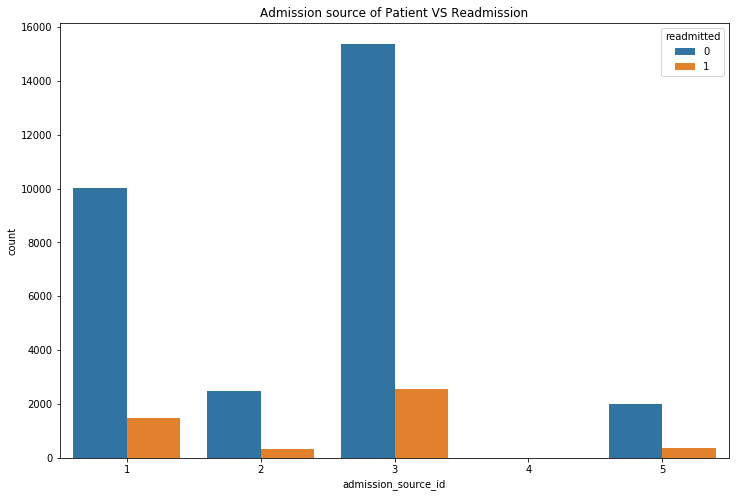

In [48]:
fig = plt.figure(figsize=(12,8))
sns.countplot(x= df['admission_source_id'], hue = df['readmitted']).set_title('Admission source of Patient VS Readmission')

In [49]:
# Dropping unwanted columns
df = df.drop(['diagnosis_1', 'diagnosis_2','diagnosis_3','AdmissionID','Admission_date','Discharge_date'], axis=1)

In [50]:
# Renaming D1,D2,D3 as diagnosis_1,diagnosis_2,diagnosis_3
df = df.rename({'D1': 'diagnosis_1', 'D2': 'diagnosis_2','D3': 'diagnosis_3'}, axis=1)


In [51]:
# Dummyfication of categorical variable
df1 = df[[
'race',
'gender',
'max_glu_serum',
'A1Cresult',
'metformin',
'repaglinide',
'nateglinide',
'glimepiride',
'glipizide',
'glyburide',
'pioglitazone',
'rosiglitazone',
'insulin',
'glyburide.metformin',
'change',
'diabetesMed',
'admission_type_id',
'discharge_disposition_id',
'admission_source_id',
'diagnosis_1',
'diagnosis_2',
'diagnosis_3'
]].astype('category')


In [52]:
for i in df1.columns:
    if len(df1.groupby([i]).size()) > 2:
         df1 = pd.get_dummies(df1, prefix=[i], columns=[i])
df1 = pd.get_dummies(df1, drop_first=True)

In [53]:
# Normalization of numerical variables
df2 = df[['age',
'num_lab_procedures',
'num_procedures',
'num_medications',
'num_diagnoses',
'time_in_hospital']].astype('int64')

In [54]:
# Creating function for normalization
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

df2 = standardize(df2)

### Model Building

In [55]:
# Creating input and output data
train_input = pd.concat([df1,df2], axis=1)
train_output= df[['readmitted']].astype('category')


### Logistic Regression

In [57]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

C:\Users\U0170371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\U0170371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


New dataset shape Counter({0: 29891, 1: 29891})


In [60]:
from sklearn.model_selection import train_test_split
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logit = LogisticRegression(fit_intercept=True, penalty='l1')
logit.fit(X_train, y_train)

C:\Users\U0170371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,3692,2224,5916
1,2248,3793,6041
All,5940,6017,11957


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.63
Precision is 0.63
Recall is 0.63


### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=21, criterion = "entropy", min_samples_split=8)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=21,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,5342,574,5916
1,1126,4915,6041
All,6468,5489,11957


In [79]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

Accuracy is 0.86
Precision is 0.90
Recall is 0.81


                       Feature  Importance
65             diagnosis_3_7.0    0.013703
31             diagnosis_1_7.0    0.017850
48             diagnosis_2_7.0    0.021080
92               num_diagnoses    0.022712
90              num_procedures    0.023701
15  discharge_disposition_id_2    0.029361
91             num_medications    0.031688
89          num_lab_procedures    0.036450
88                         age    0.066011
93            time_in_hospital    0.509742


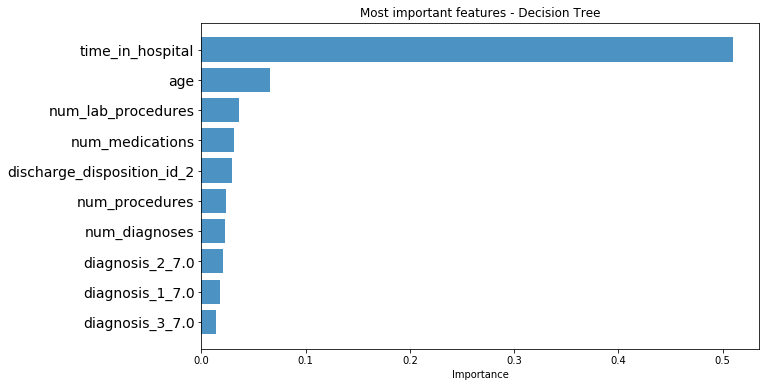

In [80]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 11, max_depth=21, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=21, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,5689,227,5916
1,838,5203,6041
All,6527,5430,11957


In [83]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

Accuracy is 0.91
Precision is 0.96
Recall is 0.86


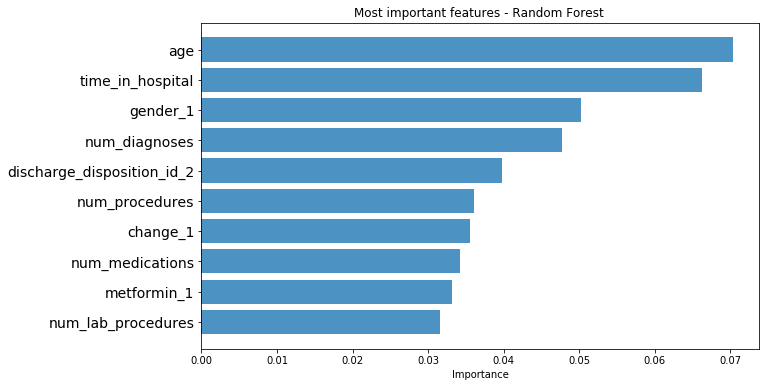

In [84]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

## Conclusion

On our train dataset Random forest tree model gives highest Accuracy, Precision and Recall value, with feature of importance as time spent in the hospital, age, number of medication and numberof daignoses.

While on test dataset Decision Tree model gives better Accuracy, Precision and Recall value, with feature of importance as time spent in the hospital,age, daignoses, and number of medication.

Here, Recall value plays an important role, since hospitals get penalized and incure additional costs both for the patient and the insurance agencies if a patient expected not to be readmitted shows up in 30 days.